In [1]:
import sys
import json
import re
import bindings.frontend as ph
import examples.pyhusky.outliers as ol
ph.env.pyhusky_start("master",14955,params={'disable_progress':True})
line = ph.env.load("/datasets/crawl/esf-sz")
lloads = line.map(lambda line:json.loads(line))
hsinf=lloads.map(lambda x:(x["price"].split(u'\xa0')[0], re.split(u'\xa0|\u5e73',x["hs_inf"][0])[1]))
real_hs =hsinf.filter(lambda x: re.compile('^\d+').search(x[1])).map(lambda x:(float(x[0]),float(x[1]))).cache()
num = real_hs.count()
data = real_hs.collect()
price_d = []
area_d = []
for pair in data:
    price_d.append(pair[0])
    area_d.append(pair[1])
mid_price = sorted(price_d)[int(num/2)]
mid_area = sorted(area_d)[int(num/2)]
price_p = real_hs.map(lambda x:10000*x[0]/x[1]).collect()
mid_price_p = sorted(price_p)[int(num/2)]
price_square = real_hs.reduce(lambda x,y:(x[0]+y[0], x[1]+y[1]))

print "深圳二手房数据总套数:",num
print "深圳二手房平均价格是:",price_square[0]/price_square[1],"万元/平方"
print "深圳二手房房价中位数是:",mid_price,"万元"
print "深圳二手房面积中位数是:",mid_area,"平方米"
print "深圳二手房独立房价中位数是:",mid_price_p,"元/平方"


深圳二手房数据总套数: 33057
深圳二手房平均价格是: 7.34657594678 万元/平方
深圳二手房房价中位数是: 430.0 万元
深圳二手房面积中位数是: 84.0 平方米
深圳二手房独立房价中位数是: 55294.1176471 元/平方



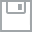
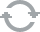
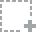
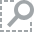
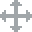
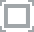
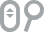
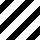
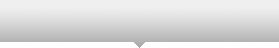
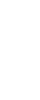
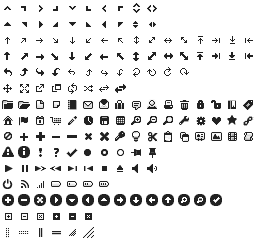
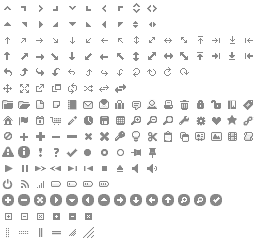
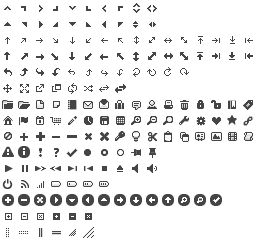
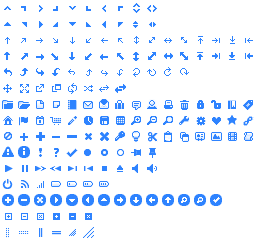
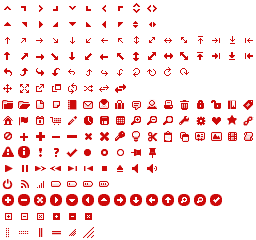
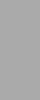
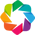
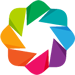

In [2]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
from bokeh.models import Range1d
output_notebook()

p = figure(plot_width = 1024, plot_height = 1024)


p.circle(area_d, price_d, size = 10, color ='#448800', alpha = 0.08)

p.x_range = Range1d(0, 500)
p.y_range = Range1d(0, 3000)



p.title = 'Relationship between area and price for second-hand houses in shenzhen'
p.title_text_font_size = '14pt'
p.xaxis.axis_label = 'Area(平方米)'
p.yaxis.axis_label = 'Price(万元)'


show(p)